In [1]:
import pandas as pd
import numpy as np
import geohash

In [2]:
names = ["time", "time_num", "time_cos", "time_sin", "day", "day_num", "day_cos", "day_sin", "weekend", "geohash", "pickups"]
dftaxi = pd.read_csv("taxi_data.csv", header = None, names = names)

In [3]:
Xnames = ["time", "time_num", "time_cos", "time_sin", "day",
          "day_num", "day_cos", "day_sin", "weekend", "geohash"]
X = dftaxi[Xnames]

In [4]:
y = np.log10(dftaxi['pickups']+1).astype(float)

In [5]:
def decodegeo(geo, which):
    if len(geo) >= 6:
        geodecoded = geohash.decode(geo)
        return geodecoded[which]
    else:
        return 0

In [6]:
X.head()

,time,time_num,time_cos,time_sin,day,day_num,day_cos,day_sin,weekend,geohash
0,22:00,0.937500,0.923880,-0.382683,Monday,0.133929,0.666347,0.745642,0,dr5rst
1,22:00,0.937500,0.923880,-0.382683,Monday,0.133929,0.666347,0.745642,0,dr5xep
2,02:00,0.104167,0.793353,0.608761,Wednesday,0.300595,-0.312572,0.949894,0,dr5rek
3,05:00,0.229167,0.130526,0.991445,Thursday,0.461310,-0.970597,0.240712,0,dr72qr
4,08:00,0.354167,-0.608761,0.793353,Tuesday,0.193452,0.347871,0.937542,0,dr70jn


In [7]:
y.head()

0    3.738543
1    0.602060
2    1.278754
3    1.740363
4    0.477121
Name: pickups, dtype: float64

In [8]:
X['latitude'] = X['geohash'].apply(lambda geo: decodegeo(geo, 0))
X['longitude'] = X['geohash'].apply(lambda geo: decodegeo(geo, 1))

In [9]:
list_Xname = list(X.drop(['time','day','geohash'], axis=1).columns.values)
X = np.asarray(X.drop(['time','day','geohash'], axis=1).astype(float))
y = np.asarray(y, dtype="|S6")

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=5)
clf = clf.fit(X, y)
imp = clf.feature_importances_

In [17]:
print imp

[ 0.07469235  0.09498929  0.06688811  0.12109342  0.14411585  0.09711241
  0.0143145   0.18008993  0.20670415]


In [18]:
import matplotlib.pyplot as plt

In [19]:
dictionary = plt.figure()
plt.bar(range(len(imp)), imp, align='center', alpha = 0.5)
plt.xticks(range(len(list_Xname)), list_Xname, rotation='vertical')
plt.subplots_adjust(bottom=0.2)
#plt.savefig('feature_importance.png')

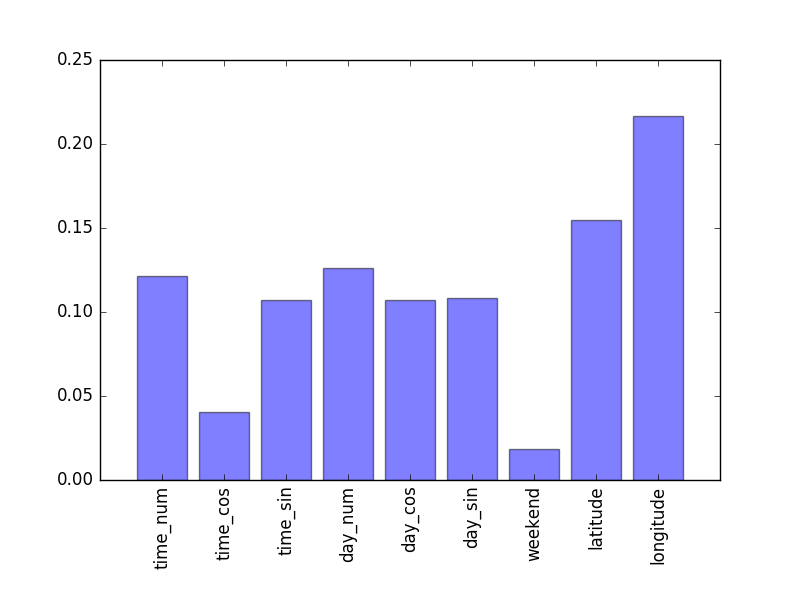

In [20]:
from IPython.display import Image
Image("feature_importance.png")